
<a name="top"></a>
# <div style="text-align: center"> <u>Data Science Capstone Project </u> </div>
# <div style="text-align: center"><u>_The Battle of the Neighborhoods_<u/></div>



## Importing necessary libraries:

In [1]:
!pip install --user beautifulsoup4
!pip install --user lxml
!pip install --user requests
!pip install --user pandas
!pip install --user geopy
!pip install --user folium
!pip install --user sklearn
!pip install --user matplotlib

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
from IPython.display import display_html
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library
from bs4 import BeautifulSoup

# import k-means from clustering stage
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing th

### Web Scraping District Data 
The list of all districts in Yerevan is obtained by scraping the relevant webpage. The data in the webpage is in the form a table. 

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/Districts_of_Yerevan').text
soup=BeautifulSoup(source, 'lxml')
table = str(soup.table)
display_html(table,raw=True)

District,Armenian,Population (2011 census),Population (2016 estimate),Area (km²)
Ajapnyak,Աջափնյակ,"108,282","109,100",25.82
Arabkir,Արաբկիր,"117,704","115,800",13.29
Avan,Ավան,"53,231","53,100",7.26
Davtashen,Դավթաշեն,"42,380","42,500",6.47
Erebuni,Էրեբունի,"123,092","126,500",47.49
Kanaker-Zeytun,Քանաքեռ-Զեյթուն,"73,886","74,100",7.73
Kentron,Կենտրոն,"125,453","125,700",13.35
Malatia-Sebastia,Մալաթիա-Սեբաստիա,"132,900","135,900",25.16
Nork-Marash,Նորք-Մարաշ,"12,049","11,800",4.76
Nor Nork,Նոր Նորք,"126,065","130,300",14.11


### Loading Districts 

In [3]:
df_source = pd.read_html(table)
df=df_source[0]
df.head()

,District,Armenian,Population (2011 census),Population (2016 estimate),Area (km²)
0,Ajapnyak,Աջափնյակ,108282,109100,25.82
1,Arabkir,Արաբկիր,117704,115800,13.29
2,Avan,Ավան,53231,53100,7.26
3,Davtashen,Դավթաշեն,42380,42500,6.47
4,Erebuni,Էրեբունի,123092,126500,47.49


In [4]:
df.shape

(12, 5)

### Obtaining Districts' Coordinates  

In [5]:
df_coordinates = pd.read_csv('districts.csv')
df_coordinates.head(20)

,District,Latitude,Longitude
0,Ajapnyak,40.211567,44.416573
1,Arabkir,40.212991,44.480189
2,Avan,40.223600,44.557040
3,Davtashen,40.224784,44.465119
4,Erebuni,40.131373,44.515156
5,Kanaker-Zeytun,40.214590,44.502848
6,Kentron,40.178103,44.494913
7,Malatia-Sebastia,40.185313,44.355868
8,Nork-Marash,40.180059,44.522229
9,Nor Nork,40.183795,44.541669


In [6]:
df_coordinates.columns=['District','Latitude','Longitude']
df_total = pd.merge(df, df_coordinates, on='District')
df_total

,District,Armenian,Population (2011 census),Population (2016 estimate),Area (km²),Latitude,Longitude
0,Ajapnyak,Աջափնյակ,108282,109100,25.82,40.211567,44.416573
1,Arabkir,Արաբկիր,117704,115800,13.29,40.212991,44.480189
2,Avan,Ավան,53231,53100,7.26,40.223600,44.557040
3,Davtashen,Դավթաշեն,42380,42500,6.47,40.224784,44.465119
4,Erebuni,Էրեբունի,123092,126500,47.49,40.131373,44.515156
5,Kanaker-Zeytun,Քանաքեռ-Զեյթուն,73886,74100,7.73,40.214590,44.502848
6,Kentron,Կենտրոն,125453,125700,13.35,40.178103,44.494913
7,Malatia-Sebastia,Մալաթիա-Սեբաստիա,132900,135900,25.16,40.185313,44.355868
8,Nork-Marash,Նորք-Մարաշ,12049,11800,4.76,40.180059,44.522229
9,Nor Nork,Նոր Նորք,126065,130300,14.11,40.183795,44.541669


## Yerevan Districts' Map 


### Obtaining the coordinates of the Yerevan center:

In [7]:
address = 'Yerevan, Armenia'
geolocator = Nominatim(user_agent="Yerevan")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Yerevan, Armenia are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Yerevan, Armenia are 40.1776121, 44.5125849.


Creating a map of Yerevan: 

In [8]:
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, district in zip(df_total['Latitude'], df_total['Longitude'], df_total['District']):
    label = district
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

### Defining Foursquare Credentials and Version   

In [9]:
CLIENT_ID = 'VNWC5NGFMAXRA31IGYF10SB423XATFAMQEPVTD0RLCMJ4RGB' # my Foursquare ID
CLIENT_SECRET = 'O11DEZDTIXR3TSJHECUORJZQPQNR0QM0LIA3HSELA0HMUFOA' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: VNWC5NGFMAXRA31IGYF10SB423XATFAMQEPVTD0RLCMJ4RGB
CLIENT_SECRET:O11DEZDTIXR3TSJHECUORJZQPQNR0QM0LIA3HSELA0HMUFOA


### Exploring all Districts  

In [10]:
RADIUS = 1200
LIMIT = 1000

venues_list = []

for latitude, longitude, district in zip(df_total['Latitude'], df_total['Longitude'], df_total['District']):
    print("Getting venues for district {} with coordinates {},{}".format(district, latitude, longitude))

    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, RADIUS, LIMIT)

    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']

    # return only relevant information for each nearby venue
    venues_list.append([(
        district, 
        latitude, 
        longitude, 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results
    ])

venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])

if len(venues) > 0:
    venues.columns = ['District', 
                'District Latitude', 
                'District Longitude', 
                'Venue', 
                'Venue Latitude', 
                'Venue Longitude', 
                'Venue Category']

venues.head()

Getting venues for district Ajapnyak with coordinates 40.2115669,44.4165735
Getting venues for district Arabkir with coordinates 40.2129907,44.48018870000001
Getting venues for district Avan with coordinates 40.2235999,44.5570405
Getting venues for district Davtashen with coordinates 40.2247837,44.4651191
Getting venues for district Erebuni with coordinates 40.131373499999995,44.51515620000001
Getting venues for district Kanaker-Zeytun with coordinates 40.2145898,44.5028485
Getting venues for district Kentron with coordinates 40.1781026,44.4949131
Getting venues for district Malatia-Sebastia with coordinates 40.1853132,44.3558676
Getting venues for district Nork-Marash with coordinates 40.1800589,44.522228600000005
Getting venues for district Nor Nork with coordinates 40.1837946,44.541668900000005
Getting venues for district Nubarashen with coordinates 40.1027199,44.515232899999994
Getting venues for district Shengavit with coordinates 40.1353813,44.4306965


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arabkir,40.212991,44.480189,Yerevan Physics Institute Park | Երևանի ֆիզիկա...,40.204106,44.484004,Park
1,Arabkir,40.212991,44.480189,Tashir Pizza,40.218414,44.489403,Pizza Place
2,Arabkir,40.212991,44.480189,Kvartalplatz,40.211204,44.471614,Plaza
3,Arabkir,40.212991,44.480189,"Park of Republican hospital ""Lich/Լիճ""",40.205533,44.478537,Park
4,Arabkir,40.212991,44.480189,Gevorg Chaush square | Գևորգ Չաուշի հրապարակ,40.208989,44.468457,Plaza


In [11]:
venues.shape

(197, 7)

In [12]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 84 uniques categories.


### Analyzing each District  

In [13]:
# one hot encoding
yerevan_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
yerevan_onehot['District'] = venues['District'] 

# move neighborhood column to the first column
fixed_columns = [yerevan_onehot.columns[-1]] + list(yerevan_onehot.columns[:-1])
yerevan_onehot = yerevan_onehot[fixed_columns]

yerevan_onehot.head()

,District,American Restaurant,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Bookstore,Border Crossing,...,Tennis Court,Theater,Tram Station,Vegetarian / Vegan Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Winery,Women's Store,Yoga Studio
0,Arabkir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arabkir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arabkir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arabkir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arabkir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
yerevan_onehot.shape

(197, 85)

### Grouping rows by district by taking the mean of the frequency of occurrence of each category. 

In [15]:
yerevan_grouped = yerevan_onehot.groupby('District').mean().reset_index()
yerevan_grouped

,District,American Restaurant,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Bookstore,Border Crossing,...,Tennis Court,Theater,Tram Station,Vegetarian / Vegan Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Winery,Women's Store,Yoga Studio
0,Arabkir,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Avan,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Davtashen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Erebuni,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.166667,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kanaker-Zeytun,0.000000,0.000000,0.157895,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Kentron,0.017241,0.000000,0.017241,0.017241,0.017241,0.017241,0.017241,0.000000,0.000000,...,0.017241,0.017241,0.000000,0.000000,0.000000,0.017241,0.017241,0.000000,0.017241,0.017241
6,Nor Nork,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Nork-Marash,0.000000,0.022472,0.000000,0.000000,0.044944,0.022472,0.011236,0.011236,0.000000,...,0.011236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011236,0.000000,0.000000
8,Shengavit,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
yerevan_grouped.shape

(9, 85)

### Printing each district along with the top 5 most common venues.

In [17]:
num_top_venues = 5

for dist in yerevan_grouped['District']:
    print("----{}----".format(dist))
    temp = yerevan_grouped[yerevan_grouped['District'] == dist].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arabkir----
                  venue  freq
0                 Plaza  0.25
1                  Park  0.25
2      Asian Restaurant  0.12
3           Pizza Place  0.12
4  Fast Food Restaurant  0.12


----Avan----
           venue  freq
0  Go Kart Track   0.2
1           Pool   0.2
2           Park   0.2
3          Hotel   0.2
4      BBQ Joint   0.2


----Davtashen----
             venue  freq
0       Restaurant  0.33
1         Gym Pool  0.17
2      Golf Course  0.17
3  Border Crossing  0.17
4             Pool  0.17


----Erebuni----
              venue  freq
0   Warehouse Store  0.33
1  Department Store  0.17
2            Market  0.17
3      Tram Station  0.17
4             Motel  0.17


----Kanaker-Zeytun----
                         venue  freq
0                   Restaurant  0.16
1             Asian Restaurant  0.16
2                  Pizza Place  0.11
3                     Gym Pool  0.05
4  Eastern European Restaurant  0.05


----Kentron----
            venue  freq
0  Clothing Store 

### Creating a new data frame and displaying the top 10 venues for each neighbourhood.

In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [19]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = yerevan_grouped['District']

for ind in np.arange(yerevan_grouped.shape[0]):
   district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(yerevan_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head(12)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arabkir,Plaza,Park,Market,Fast Food Restaurant,Pizza Place,Asian Restaurant,Food,Department Store,Diner,Donut Shop
1,Avan,Pool,Park,Hotel,BBQ Joint,Go Kart Track,Food,Diner,Donut Shop,Eastern European Restaurant,Electronics Store
2,Davtashen,Restaurant,Pool,Border Crossing,Golf Course,Gym Pool,Bakery,Food Court,Donut Shop,Eastern European Restaurant,Electronics Store
3,Erebuni,Warehouse Store,Department Store,Tram Station,Motel,Market,Food & Drink Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store
4,Kanaker-Zeytun,Asian Restaurant,Restaurant,Pizza Place,Supermarket,Gym Pool,Hotel,Fast Food Restaurant,Eastern European Restaurant,Comfort Food Restaurant,Gym
5,Kentron,Clothing Store,Restaurant,Museum,Hotel,Shoe Store,Diner,Yoga Studio,Memorial Site,Lounge,Hot Dog Joint
6,Nor Nork,Hotel,Pool,Gourmet Shop,Bed & Breakfast,Food & Drink Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Fast Food Restaurant
7,Nork-Marash,Restaurant,Hotel,Café,Plaza,Supermarket,Bakery,Coffee Shop,Pub,Jazz Club,Eastern European Restaurant
8,Shengavit,Grocery Store,Yoga Studio,Food Court,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food


## Clustering Neighborhoods
### The first step is to determine the optimal value of K for the dataset using the Silhouette Coefficient Method.

### A higher Silhouette Coefficient score relates to a model with better defined clusters.


In [20]:
from sklearn.metrics import silhouette_score

yerevan_grouped_clustering = yerevan_grouped.drop('District', 1)

for n_cluster in range(2, 8):
    kmeans = KMeans(n_clusters=n_cluster).fit(yerevan_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(yerevan_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.47009004805965965
For n_clusters=3, The Silhouette Coefficient is 0.15337253768836623
For n_clusters=4, The Silhouette Coefficient is 0.1608999393366023
For n_clusters=5, The Silhouette Coefficient is 0.14267675039816113
For n_clusters=6, The Silhouette Coefficient is 0.13851838677419204
For n_clusters=7, The Silhouette Coefficient is 0.13711601523560812


### The Silhouette Coefficient is the highest for n_clusters=2. Therefore, the districts shall be grouped into 2 clusters (k=2) using k-means clustering.

In [21]:
# set number of clusters
kclusters = 2

yerevan_grouped_clustering = yerevan_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(yerevan_grouped_clustering)

# check cluster labels generated for each row in the data frame
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating a new data frame that includes the cluster as well as the top 10 venues for each neighbourhood.

In [22]:
# add clustering labels
district_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_.astype(int))
# district_venues_sorted['Cluster Label']=kmeans.labels_.astype(int)
yerevan_merged = venues

# merge yerevan_grouped with nhoods to add latitude/longitude for each Neighbourhood
yerevan_merged = yerevan_merged.join(district_venues_sorted.set_index('District'), on='District')
yerevan_merged.dropna(inplace=True)
yerevan_merged['Cluster Label'] = yerevan_merged['Cluster Label'].astype(int)
yerevan_merged.head() 

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arabkir,40.212991,44.480189,Yerevan Physics Institute Park | Երևանի ֆիզիկա...,40.204106,44.484004,Park,0,Plaza,Park,Market,Fast Food Restaurant,Pizza Place,Asian Restaurant,Food,Department Store,Diner,Donut Shop
1,Arabkir,40.212991,44.480189,Tashir Pizza,40.218414,44.489403,Pizza Place,0,Plaza,Park,Market,Fast Food Restaurant,Pizza Place,Asian Restaurant,Food,Department Store,Diner,Donut Shop
2,Arabkir,40.212991,44.480189,Kvartalplatz,40.211204,44.471614,Plaza,0,Plaza,Park,Market,Fast Food Restaurant,Pizza Place,Asian Restaurant,Food,Department Store,Diner,Donut Shop
3,Arabkir,40.212991,44.480189,"Park of Republican hospital ""Lich/Լիճ""",40.205533,44.478537,Park,0,Plaza,Park,Market,Fast Food Restaurant,Pizza Place,Asian Restaurant,Food,Department Store,Diner,Donut Shop
4,Arabkir,40.212991,44.480189,Gevorg Chaush square | Գևորգ Չաուշի հրապարակ,40.208989,44.468457,Plaza,0,Plaza,Park,Market,Fast Food Restaurant,Pizza Place,Asian Restaurant,Food,Department Store,Diner,Donut Shop


### Visualizing the resulting district clusters on the map.

In [23]:
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow[0] = '#FF0000'
rainbow[1]='#006ff6'
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(yerevan_merged['District Latitude'], yerevan_merged['District Longitude'], yerevan_merged['District'], yerevan_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 100px; left: 50px; width: 120px; height: 80px; 
                            border:3px solid black; z-index:9999; font-size:13px;
                            ">&nbsp; Red - Cluster 0 <br>
                              &nbsp; Blue - Cluster 1 <br>
                                             </div>
                ''' 

map_clusters.get_root().html.add_child(folium.Element(legend_html))
map_clusters

## Examining the Clusters  

In [24]:
yerevan_merged.loc[yerevan_merged['Cluster Label'] == 0, yerevan_merged.columns[[0] + list(range(2, yerevan_merged.shape[1]))]]

,District,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arabkir,44.480189,Yerevan Physics Institute Park | Երևանի ֆիզիկա...,40.204106,44.484004,Park,0,Plaza,Park,Market,Fast Food Restaurant,Pizza Place,Asian Restaurant,Food,Department Store,Diner,Donut Shop
1,Arabkir,44.480189,Tashir Pizza,40.218414,44.489403,Pizza Place,0,Plaza,Park,Market,Fast Food Restaurant,Pizza Place,Asian Restaurant,Food,Department Store,Diner,Donut Shop
2,Arabkir,44.480189,Kvartalplatz,40.211204,44.471614,Plaza,0,Plaza,Park,Market,Fast Food Restaurant,Pizza Place,Asian Restaurant,Food,Department Store,Diner,Donut Shop
3,Arabkir,44.480189,"Park of Republican hospital ""Lich/Լիճ""",40.205533,44.478537,Park,0,Plaza,Park,Market,Fast Food Restaurant,Pizza Place,Asian Restaurant,Food,Department Store,Diner,Donut Shop
4,Arabkir,44.480189,Gevorg Chaush square | Գևորգ Չաուշի հրապարակ,40.208989,44.468457,Plaza,0,Plaza,Park,Market,Fast Food Restaurant,Pizza Place,Asian Restaurant,Food,Department Store,Diner,Donut Shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Nor Nork,44.541669,Panorama Hotel,40.175357,44.533813,Bed & Breakfast,0,Hotel,Pool,Gourmet Shop,Bed & Breakfast,Food & Drink Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Fast Food Restaurant
192,Nor Nork,44.541669,Hotel Regineh,40.184473,44.533121,Hotel,0,Hotel,Pool,Gourmet Shop,Bed & Breakfast,Food & Drink Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Fast Food Restaurant
193,Nor Nork,44.541669,Pool @ Regineh Hotel,40.184439,44.533392,Pool,0,Hotel,Pool,Gourmet Shop,Bed & Breakfast,Food & Drink Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Fast Food Restaurant
194,Nor Nork,44.541669,Nare ( Наре ),40.177669,44.538260,Hotel,0,Hotel,Pool,Gourmet Shop,Bed & Breakfast,Food & Drink Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Fast Food Restaurant


In [25]:
yerevan_merged.loc[yerevan_merged['Cluster Label'] == 1, yerevan_merged.columns[[0] + list(range(2, yerevan_merged.shape[1]))]]

,District,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
196,Shengavit,44.430697,Nor Zovq Aeracia,40.14313,44.436529,Grocery Store,1,Grocery Store,Yoga Studio,Food Court,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food


In [26]:
yerevan_results = pd.DataFrame(kmeans.cluster_centers_)
yerevan_results.columns = yerevan_grouped_clustering.columns
yerevan_results.index = ['Cluster 0','Cluster 1']
yerevan_results['Total Sum'] = yerevan_results.sum(axis = 1)
yerevan_results

,American Restaurant,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Bookstore,Border Crossing,Buffet,...,Theater,Tram Station,Vegetarian / Vegan Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Winery,Women's Store,Yoga Studio,Total Sum
Cluster 0,0.002155,0.002809,0.037517,0.033734,0.007773,0.004964,0.02856,0.001404,0.020833,0.001404,...,0.002155,0.020833,0.006579,0.041667,0.002155,0.002155,0.001404,0.002155,0.002155,1.0
Cluster 1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


## Visualizing Top 10 Venues for each Cluster  

In [27]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [28]:
def generate_plot(clus,i):
    
    plt.style.use('default')

    tags=['Restaurant','Coffee','Food','Pizza','Sandwich']
    colors = []
    for value in clus.index: 
        if  any(t in value for t in tags):
            colors.append('#a80000')
        else:
            colors.append('#32069f')

    ax=clus.plot(kind='barh', figsize=(16,8), color=colors, alpha=0.7)

    plt.title('(in % of all venues)\n')
    ax.title.set_fontsize(14)
    plt.suptitle('Ten Most Prevalent Venues of Cluster {}'.format(i), fontsize=16)

    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.xticks([])
    ax.tick_params(axis ='both', which ='both', length = 0)
    labels = [(item.get_text()+'  ') for item in ax.get_yticklabels()]
    ax.set_yticklabels(labels)

    for label in (ax.get_yticklabels()):
        label.set_fontsize(12)

    for index, value in enumerate(clus): 
        label = "%.1f " % round(value*100,1) + "%"
        # place text at the end of bar (adding 0.001 to x, and 0.1 from y to make it appear just after the bar)
        plt.annotate(label, xy=(value + 0.001, index - 0.1), color='black',fontsize=12)

    legend_elements = [Patch(facecolor='#a80000', edgecolor='#a80000',
                             label='Food Venues',alpha=0.7),
                       Patch(facecolor='#32069f', edgecolor='#32069f',
                             label='Others',alpha=0.7)]

    ax.legend(handles=legend_elements, loc='best',fontsize=12)

    plt.show()

,Hotel,Restaurant,Pool,Park,Warehouse Store,Plaza,Asian Restaurant,Market,BBQ Joint,Pizza Place,...,Tea Room,Hostel,Donut Shop,Flea Market,Music Venue,Food & Drink Shop,Library,Shipping Store,Salad Place,Nightclub
Cluster 0,0.09928,0.083415,0.074393,0.058405,0.041667,0.040428,0.037517,0.036458,0.033734,0.028783,...,0.001404,0.001404,0.001404,0.001404,0.001404,0.001404,0.001404,0.001404,0.001404,0.001404


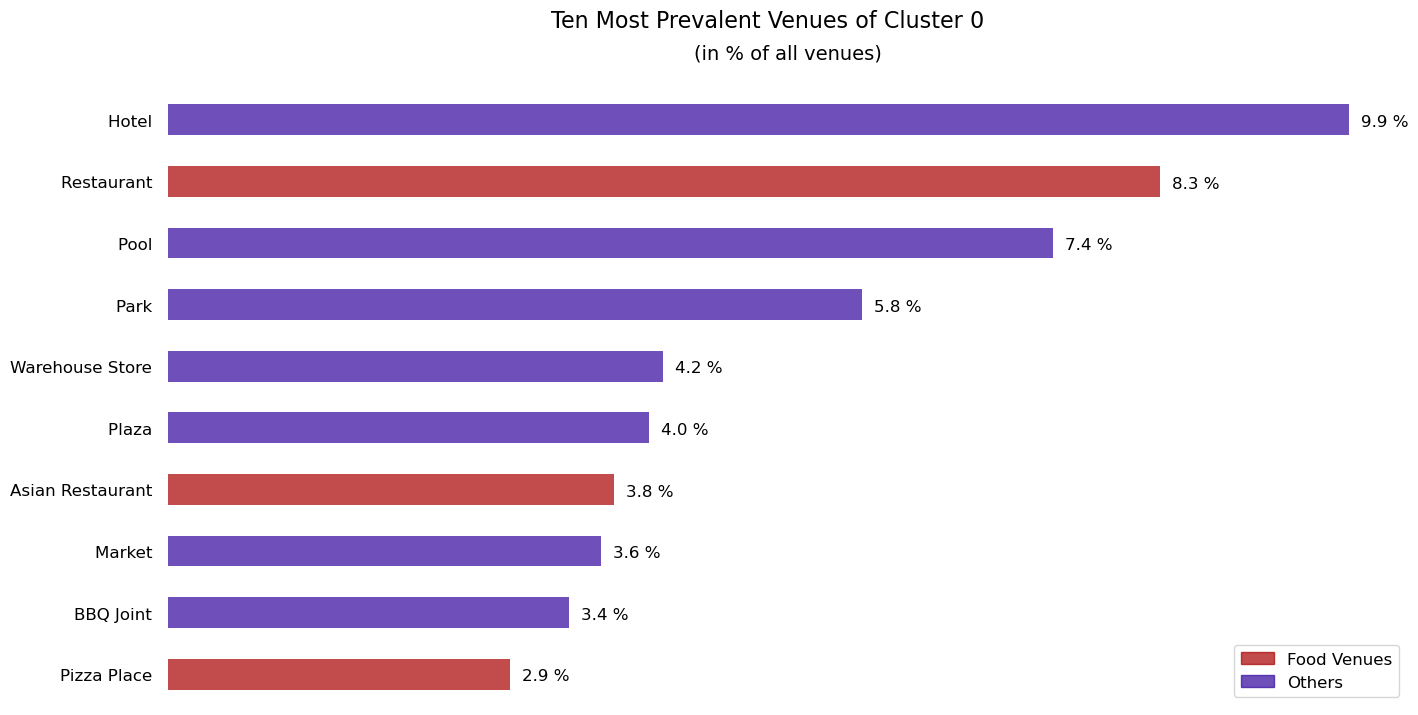

In [29]:
cluster0=pd.DataFrame(yerevan_results.iloc[0,0:-1]).transpose()
cluster0.sort_values(by='Cluster 0',axis=1,ascending=False,inplace=True)
display(cluster0)

clus0=cluster0.iloc[0,9::-1]
generate_plot(clus0,0)

,Grocery Store,American Restaurant,Motel,Plaza,Pizza Place,Park,Office,Nightclub,Music Venue,Museum,...,French Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Yoga Studio
Cluster 1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


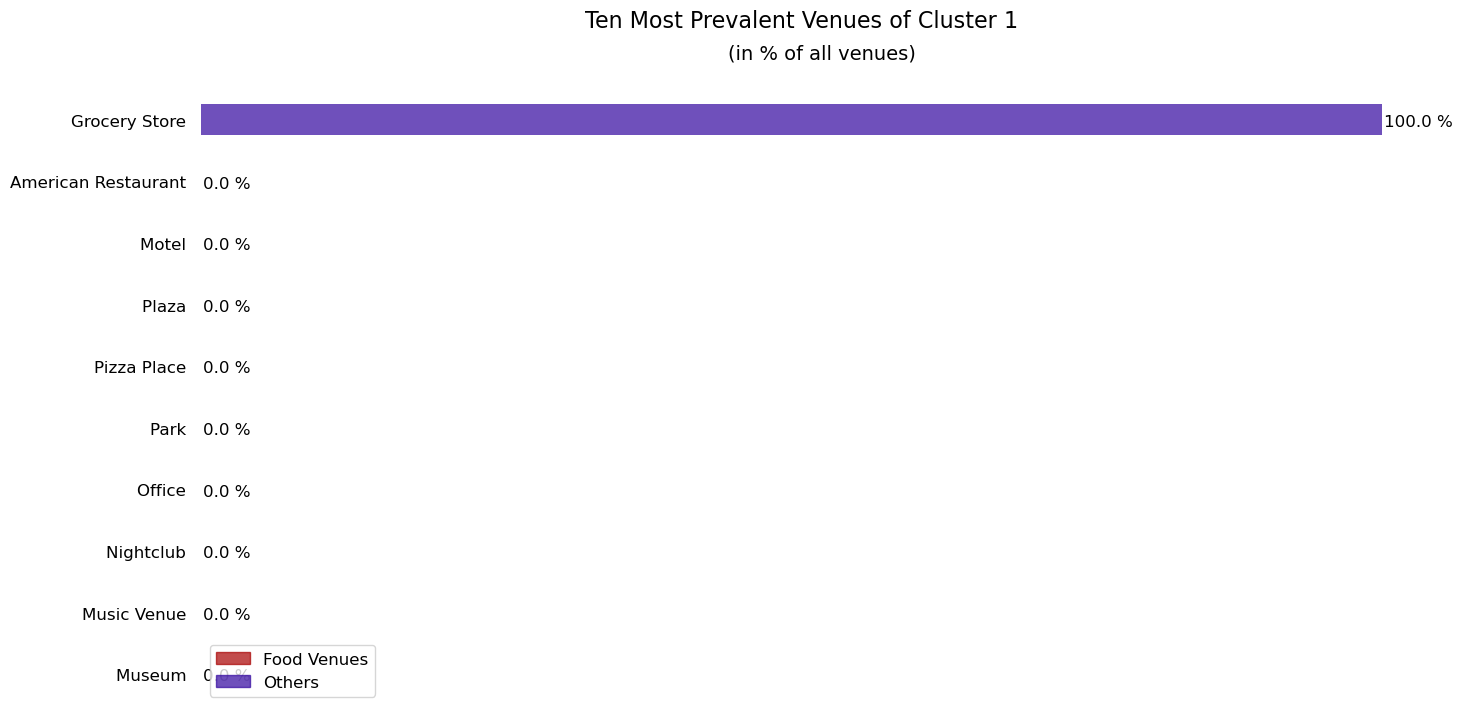

In [30]:
cluster1=pd.DataFrame(yerevan_results.iloc[1,0:-1]).transpose()
cluster1.sort_values(by='Cluster 1',axis=1,ascending=False,inplace=True)
display(cluster1)

clus1=cluster1.iloc[0,9::-1]
generate_plot(clus1,1)

In [31]:
clus1dist=yerevan_merged.loc[yerevan_merged['Cluster Label'] == 1, yerevan_merged.columns[0]].values.tolist()
clus1dist = list(dict.fromkeys(clus1dist))
clus1dist

['Shengavit']

In [32]:
clus0dist=yerevan_merged.loc[yerevan_merged['Cluster Label'] == 0, yerevan_merged.columns[0]].values.tolist()
clus0dist = list(dict.fromkeys(clus0dist))
clus0dist

['Arabkir',
 'Avan',
 'Davtashen',
 'Erebuni',
 'Kanaker-Zeytun',
 'Kentron',
 'Nork-Marash',
 'Nor Nork']

In [33]:
filtered_districts=venues.copy()

for i in range(0,len(filtered_districts)):

    if filtered_districts.iloc[i,0] not in clus0dist:
        filtered_districts.iloc[i,0]='TO DROP'

In [34]:
filtered_districts=filtered_districts[filtered_districts.District!='TO DROP']
filtered_districts.reset_index(drop=True,inplace=True)

In [35]:
filtered_districts.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arabkir,40.212991,44.480189,Yerevan Physics Institute Park | Երևանի ֆիզիկա...,40.204106,44.484004,Park
1,Arabkir,40.212991,44.480189,Tashir Pizza,40.218414,44.489403,Pizza Place
2,Arabkir,40.212991,44.480189,Kvartalplatz,40.211204,44.471614,Plaza
3,Arabkir,40.212991,44.480189,"Park of Republican hospital ""Lich/Լիճ""",40.205533,44.478537,Park
4,Arabkir,40.212991,44.480189,Gevorg Chaush square | Գևորգ Չաուշի հրապարակ,40.208989,44.468457,Plaza


In [36]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [37]:
def get_district_restaurants(url1):
    
    results = requests.get(url1).json()

    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a data frame
    dataframe = json_normalize(venues)

    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    
    display(dataframe_filtered.loc[:,['name','categories','distance','lat','lng']])

In [38]:
category='4bf58dd8d48988d1c4941735'
radius = 2000
LIMIT=100

In [39]:
for n in range(0,len(filtered_districts)):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    filtered_districts.iloc[n,1], 
    filtered_districts.iloc[n,2], 
    VERSION, 
    category, 
    radius, 
    LIMIT)
    print('------------------------------------------------- '+ filtered_districts.iloc[n,0] + ' -------------------------------------------------')
    get_district_restaurants(url)
    print('\n\n')

------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Bohem restaurant and motel,Restaurant,1808,40.206300,44.460800
3,At the colonel,Restaurant,1523,40.216705,44.497438
4,Gandzaqar,Restaurant,1425,40.213074,44.496956
5,ресторан Африкян,Restaurant,1970,40.201421,44.497732
6,Genatsvale,Restaurant,2283,40.206345,44.505606
7,Deluxe,Restaurant,1892,40.202259,44.497448
8,janli restaurant,Restaurant,2200,40.201035,44.500807
9,Odalen Restaurant,Restaurant,1181,40.215220,44.493776





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Bohem restaurant and motel,Restaurant,1808,40.206300,44.460800
3,Deluxe,Restaurant,1892,40.202259,44.497448
4,ресторан Африкян,Restaurant,1970,40.201421,44.497732
5,Genatsvale,Restaurant,2283,40.206345,44.505606
6,Gandzaqar,Restaurant,1425,40.213074,44.496956
7,At the colonel,Restaurant,1523,40.216705,44.497438
8,janli restaurant,Restaurant,2200,40.201035,44.500807
9,Odalen Restaurant,Restaurant,1181,40.215220,44.493776





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Bohem restaurant and motel,Restaurant,1808,40.206300,44.460800
3,janli restaurant,Restaurant,2200,40.201035,44.500807
4,Deluxe,Restaurant,1892,40.202259,44.497448
5,At the colonel,Restaurant,1523,40.216705,44.497438
6,ресторан Африкян,Restaurant,1970,40.201421,44.497732
7,Gandzaqar,Restaurant,1425,40.213074,44.496956
8,Genatsvale,Restaurant,2283,40.206345,44.505606
9,Odalen Restaurant,Restaurant,1181,40.215220,44.493776





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Bohem restaurant and motel,Restaurant,1808,40.206300,44.460800
3,janli restaurant,Restaurant,2200,40.201035,44.500807
4,Gandzaqar,Restaurant,1425,40.213074,44.496956
5,Genatsvale,Restaurant,2283,40.206345,44.505606
6,ресторан Африкян,Restaurant,1970,40.201421,44.497732
7,Deluxe,Restaurant,1892,40.202259,44.497448
8,At the colonel,Restaurant,1523,40.216705,44.497438
9,Odalen Restaurant,Restaurant,1181,40.215220,44.493776





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Bohem restaurant and motel,Restaurant,1808,40.206300,44.460800
3,Deluxe,Restaurant,1892,40.202259,44.497448
4,janli restaurant,Restaurant,2200,40.201035,44.500807
5,Gandzaqar,Restaurant,1425,40.213074,44.496956
6,Genatsvale,Restaurant,2283,40.206345,44.505606
7,ресторан Африкян,Restaurant,1970,40.201421,44.497732
8,At the colonel,Restaurant,1523,40.216705,44.497438
9,Odalen Restaurant,Restaurant,1181,40.215220,44.493776





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Bohem restaurant and motel,Restaurant,1808,40.206300,44.460800
3,Genatsvale,Restaurant,2283,40.206345,44.505606
4,janli restaurant,Restaurant,2200,40.201035,44.500807
5,Deluxe,Restaurant,1892,40.202259,44.497448
6,Gandzaqar,Restaurant,1425,40.213074,44.496956
7,ресторан Африкян,Restaurant,1970,40.201421,44.497732
8,At the colonel,Restaurant,1523,40.216705,44.497438
9,Odalen Restaurant,Restaurant,1181,40.215220,44.493776





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Bohem restaurant and motel,Restaurant,1808,40.206300,44.460800
3,ресторан Африкян,Restaurant,1970,40.201421,44.497732
4,At the colonel,Restaurant,1523,40.216705,44.497438
5,janli restaurant,Restaurant,2200,40.201035,44.500807
6,Gandzaqar,Restaurant,1425,40.213074,44.496956
7,Genatsvale,Restaurant,2283,40.206345,44.505606
8,Deluxe,Restaurant,1892,40.202259,44.497448
9,Odalen Restaurant,Restaurant,1181,40.215220,44.493776





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Bohem restaurant and motel,Restaurant,1808,40.206300,44.460800
3,janli restaurant,Restaurant,2200,40.201035,44.500807
4,Genatsvale,Restaurant,2283,40.206345,44.505606
5,Gandzaqar,Restaurant,1425,40.213074,44.496956
6,At the colonel,Restaurant,1523,40.216705,44.497438
7,ресторан Африкян,Restaurant,1970,40.201421,44.497732
8,Deluxe,Restaurant,1892,40.202259,44.497448
9,Odalen Restaurant,Restaurant,1181,40.215220,44.493776





------------------------------------------------- Avan -------------------------------------------------


,name,categories,distance,lat,lng
0,Мельница,Restaurant,942,40.217635,44.564908
1,Ginetun,Restaurant,1285,40.234763,44.560900
2,Etna,Restaurant,1444,40.229839,44.542132
3,Valencia Restaurant,Restaurant,1954,40.206301,44.560999
4,Restaurant Hatisi Lanjin,Restaurant,1671,40.222936,44.576689
5,Aygi Hacatun,Restaurant,1787,40.239184,44.562109
6,"""Այգի"" հացատուն",Restaurant,845,40.224790,44.566860





------------------------------------------------- Avan -------------------------------------------------


,name,categories,distance,lat,lng
0,Мельница,Restaurant,942,40.217635,44.564908
1,Ginetun,Restaurant,1285,40.234763,44.560900
2,Valencia Restaurant,Restaurant,1954,40.206301,44.560999
3,Etna,Restaurant,1444,40.229839,44.542132
4,Restaurant Hatisi Lanjin,Restaurant,1671,40.222936,44.576689
5,Aygi Hacatun,Restaurant,1787,40.239184,44.562109
6,"""Այգի"" հացատուն",Restaurant,845,40.224790,44.566860





------------------------------------------------- Avan -------------------------------------------------


,name,categories,distance,lat,lng
0,Мельница,Restaurant,942,40.217635,44.564908
1,Ginetun,Restaurant,1285,40.234763,44.560900
2,Etna,Restaurant,1444,40.229839,44.542132
3,Restaurant Hatisi Lanjin,Restaurant,1671,40.222936,44.576689
4,Valencia Restaurant,Restaurant,1954,40.206301,44.560999
5,"""Այգի"" հացատուն",Restaurant,845,40.224790,44.566860
6,Aygi Hacatun,Restaurant,1787,40.239184,44.562109





------------------------------------------------- Avan -------------------------------------------------


,name,categories,distance,lat,lng
0,Мельница,Restaurant,942,40.217635,44.564908
1,Ginetun,Restaurant,1285,40.234763,44.560900
2,Valencia Restaurant,Restaurant,1954,40.206301,44.560999
3,Restaurant Hatisi Lanjin,Restaurant,1671,40.222936,44.576689
4,Etna,Restaurant,1444,40.229839,44.542132
5,"""Այգի"" հացատուն",Restaurant,845,40.224790,44.566860
6,Aygi Hacatun,Restaurant,1787,40.239184,44.562109





------------------------------------------------- Avan -------------------------------------------------


,name,categories,distance,lat,lng
0,Мельница,Restaurant,942,40.217635,44.564908
1,Ginetun,Restaurant,1285,40.234763,44.560900
2,Valencia Restaurant,Restaurant,1954,40.206301,44.560999
3,Etna,Restaurant,1444,40.229839,44.542132
4,Restaurant Hatisi Lanjin,Restaurant,1671,40.222936,44.576689
5,"""Այգի"" հացատուն",Restaurant,845,40.224790,44.566860
6,Aygi Hacatun,Restaurant,1787,40.239184,44.562109





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Armenian Royal Palace,Hotel,2643,40.210282,44.440493
2,Erzrum,Restaurant,2405,40.230748,44.492324
3,Dolma,Restaurant,2299,40.219870,44.491397
4,Ureni,Restaurant,1060,40.225565,44.452688
5,In Fusion,Restaurant,2433,40.221185,44.493354





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Armenian Royal Palace,Hotel,2643,40.210282,44.440493
2,In Fusion,Restaurant,2433,40.221185,44.493354
3,Ureni,Restaurant,1060,40.225565,44.452688
4,Erzrum,Restaurant,2405,40.230748,44.492324
5,Dolma,Restaurant,2299,40.219870,44.491397





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Armenian Royal Palace,Hotel,2643,40.210282,44.440493
2,Erzrum,Restaurant,2405,40.230748,44.492324
3,Dolma,Restaurant,2299,40.219870,44.491397
4,Ureni,Restaurant,1060,40.225565,44.452688
5,In Fusion,Restaurant,2433,40.221185,44.493354





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Armenian Royal Palace,Hotel,2643,40.210282,44.440493
2,Dolma,Restaurant,2299,40.219870,44.491397
3,Ureni,Restaurant,1060,40.225565,44.452688
4,In Fusion,Restaurant,2433,40.221185,44.493354
5,Erzrum,Restaurant,2405,40.230748,44.492324





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Armenian Royal Palace,Hotel,2643,40.210282,44.440493
2,Erzrum,Restaurant,2405,40.230748,44.492324
3,Ureni,Restaurant,1060,40.225565,44.452688
4,Dolma,Restaurant,2299,40.219870,44.491397
5,In Fusion,Restaurant,2433,40.221185,44.493354





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Armenian Royal Palace,Hotel,2643,40.210282,44.440493
2,In Fusion,Restaurant,2433,40.221185,44.493354
3,Dolma,Restaurant,2299,40.219870,44.491397
4,Erzrum,Restaurant,2405,40.230748,44.492324
5,Ureni,Restaurant,1060,40.225565,44.452688





------------------------------------------------- Erebuni -------------------------------------------------


,name,categories,distance,lat,lng
0,voske gavat,Restaurant,2042,40.140271,44.494172
1,Pivart,Restaurant,2326,40.150185,44.527065
2,vardananq,Restaurant,2238,40.136295,44.489650





------------------------------------------------- Erebuni -------------------------------------------------


,name,categories,distance,lat,lng
0,vardananq,Restaurant,2238,40.136295,44.489650
1,voske gavat,Restaurant,2042,40.140271,44.494172
2,Pivart,Restaurant,2326,40.150185,44.527065





------------------------------------------------- Erebuni -------------------------------------------------


,name,categories,distance,lat,lng
0,voske gavat,Restaurant,2042,40.140271,44.494172
1,vardananq,Restaurant,2238,40.136295,44.489650
2,Pivart,Restaurant,2326,40.150185,44.527065





------------------------------------------------- Erebuni -------------------------------------------------


,name,categories,distance,lat,lng
0,Pivart,Restaurant,2326,40.150185,44.527065
1,voske gavat,Restaurant,2042,40.140271,44.494172
2,vardananq,Restaurant,2238,40.136295,44.489650





------------------------------------------------- Erebuni -------------------------------------------------


,name,categories,distance,lat,lng
0,vardananq,Restaurant,2238,40.136295,44.489650
1,voske gavat,Restaurant,2042,40.140271,44.494172
2,Pivart,Restaurant,2326,40.150185,44.527065





------------------------------------------------- Erebuni -------------------------------------------------


,name,categories,distance,lat,lng
0,Pivart,Restaurant,2326,40.150185,44.527065
1,vardananq,Restaurant,2238,40.136295,44.489650
2,voske gavat,Restaurant,2042,40.140271,44.494172





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,ресторан Африкян,Restaurant,1529,40.201421,44.497732
3,Deluxe,Restaurant,1447,40.202259,44.497448
4,Genatsvale,Restaurant,947,40.206345,44.505606
5,At the colonel,Restaurant,516,40.216705,44.497438
6,Harij Restaurant (Palkovnik),Restaurant,1103,40.205815,44.508894
7,Vorskan,Restaurant,1135,40.223255,44.509907
8,Prime Hall Restaurant,Restaurant,1085,40.222885,44.509561
9,janli restaurant,Restaurant,1518,40.201035,44.500807





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,Highlander,BBQ Joint,1317,40.204378,44.510679
3,Prime Hall Restaurant,Restaurant,1085,40.222885,44.509561
4,Harij Restaurant (Palkovnik),Restaurant,1103,40.205815,44.508894
5,At the colonel,Restaurant,516,40.216705,44.497438
6,ресторан Африкян,Restaurant,1529,40.201421,44.497732
7,Deluxe,Restaurant,1447,40.202259,44.497448
8,Avlabar,Restaurant,1027,40.223469,44.506130
9,Gandzaqar,Restaurant,528,40.213074,44.496956





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,Genatsvale,Restaurant,947,40.206345,44.505606
3,Prime Hall Restaurant,Restaurant,1085,40.222885,44.509561
4,Vorskan,Restaurant,1135,40.223255,44.509907
5,Harij Restaurant (Palkovnik),Restaurant,1103,40.205815,44.508894
6,janli restaurant,Restaurant,1518,40.201035,44.500807
7,Deluxe,Restaurant,1447,40.202259,44.497448
8,At the colonel,Restaurant,516,40.216705,44.497438
9,Gandzaqar,Restaurant,528,40.213074,44.496956





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,Avlabar,Restaurant,1027,40.223469,44.506130
3,Vorskan,Restaurant,1135,40.223255,44.509907
4,Deluxe,Restaurant,1447,40.202259,44.497448
5,ресторан Африкян,Restaurant,1529,40.201421,44.497732
6,At the colonel,Restaurant,516,40.216705,44.497438
7,Genatsvale,Restaurant,947,40.206345,44.505606
8,Gandzaqar,Restaurant,528,40.213074,44.496956
9,Highlander,BBQ Joint,1317,40.204378,44.510679





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,Genatsvale,Restaurant,947,40.206345,44.505606
3,Highlander,BBQ Joint,1317,40.204378,44.510679
4,Gandzaqar,Restaurant,528,40.213074,44.496956
5,At the colonel,Restaurant,516,40.216705,44.497438
6,Deluxe,Restaurant,1447,40.202259,44.497448
7,ресторан Африкян,Restaurant,1529,40.201421,44.497732
8,Avlabar,Restaurant,1027,40.223469,44.506130
9,Vorskan,Restaurant,1135,40.223255,44.509907





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,At the colonel,Restaurant,516,40.216705,44.497438
3,Prime Hall Restaurant,Restaurant,1085,40.222885,44.509561
4,ресторан Африкян,Restaurant,1529,40.201421,44.497732
5,janli restaurant,Restaurant,1518,40.201035,44.500807
6,Genatsvale,Restaurant,947,40.206345,44.505606
7,Harij Restaurant (Palkovnik),Restaurant,1103,40.205815,44.508894
8,Avlabar,Restaurant,1027,40.223469,44.506130
9,Highlander,BBQ Joint,1317,40.204378,44.510679





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,janli restaurant,Restaurant,1518,40.201035,44.500807
3,Gandzaqar,Restaurant,528,40.213074,44.496956
4,Genatsvale,Restaurant,947,40.206345,44.505606
5,Avlabar,Restaurant,1027,40.223469,44.506130
6,At the colonel,Restaurant,516,40.216705,44.497438
7,Prime Hall Restaurant,Restaurant,1085,40.222885,44.509561
8,ресторан Африкян,Restaurant,1529,40.201421,44.497732
9,Harij Restaurant (Palkovnik),Restaurant,1103,40.205815,44.508894





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,Deluxe,Restaurant,1447,40.202259,44.497448
3,Vorskan,Restaurant,1135,40.223255,44.509907
4,Prime Hall Restaurant,Restaurant,1085,40.222885,44.509561
5,Genatsvale,Restaurant,947,40.206345,44.505606
6,janli restaurant,Restaurant,1518,40.201035,44.500807
7,At the colonel,Restaurant,516,40.216705,44.497438
8,ресторан Африкян,Restaurant,1529,40.201421,44.497732
9,Harij Restaurant (Palkovnik),Restaurant,1103,40.205815,44.508894





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,Highlander,BBQ Joint,1317,40.204378,44.510679
3,Genatsvale,Restaurant,947,40.206345,44.505606
4,Avlabar,Restaurant,1027,40.223469,44.506130
5,Prime Hall Restaurant,Restaurant,1085,40.222885,44.509561
6,At the colonel,Restaurant,516,40.216705,44.497438
7,Deluxe,Restaurant,1447,40.202259,44.497448
8,ресторан Африкян,Restaurant,1529,40.201421,44.497732
9,janli restaurant,Restaurant,1518,40.201035,44.500807





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,ресторан Африкян,Restaurant,1529,40.201421,44.497732
3,Genatsvale,Restaurant,947,40.206345,44.505606
4,Deluxe,Restaurant,1447,40.202259,44.497448
5,janli restaurant,Restaurant,1518,40.201035,44.500807
6,At the colonel,Restaurant,516,40.216705,44.497438
7,Harij Restaurant (Palkovnik),Restaurant,1103,40.205815,44.508894
8,Highlander,BBQ Joint,1317,40.204378,44.510679
9,Prime Hall Restaurant,Restaurant,1085,40.222885,44.509561





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,Deluxe,Restaurant,1447,40.202259,44.497448
3,Gandzaqar,Restaurant,528,40.213074,44.496956
4,janli restaurant,Restaurant,1518,40.201035,44.500807
5,Genatsvale,Restaurant,947,40.206345,44.505606
6,Harij Restaurant (Palkovnik),Restaurant,1103,40.205815,44.508894
7,Vorskan,Restaurant,1135,40.223255,44.509907
8,Prime Hall Restaurant,Restaurant,1085,40.222885,44.509561
9,Avlabar,Restaurant,1027,40.223469,44.506130





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,Avlabar,Restaurant,1027,40.223469,44.506130
3,janli restaurant,Restaurant,1518,40.201035,44.500807
4,Deluxe,Restaurant,1447,40.202259,44.497448
5,Highlander,BBQ Joint,1317,40.204378,44.510679
6,Vorskan,Restaurant,1135,40.223255,44.509907
7,Harij Restaurant (Palkovnik),Restaurant,1103,40.205815,44.508894
8,At the colonel,Restaurant,516,40.216705,44.497438
9,Prime Hall Restaurant,Restaurant,1085,40.222885,44.509561





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,Highlander,BBQ Joint,1317,40.204378,44.510679
3,Deluxe,Restaurant,1447,40.202259,44.497448
4,ресторан Африкян,Restaurant,1529,40.201421,44.497732
5,Prime Hall Restaurant,Restaurant,1085,40.222885,44.509561
6,Genatsvale,Restaurant,947,40.206345,44.505606
7,Avlabar,Restaurant,1027,40.223469,44.506130
8,Gandzaqar,Restaurant,528,40.213074,44.496956
9,At the colonel,Restaurant,516,40.216705,44.497438





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,Highlander,BBQ Joint,1317,40.204378,44.510679
3,Genatsvale,Restaurant,947,40.206345,44.505606
4,At the colonel,Restaurant,516,40.216705,44.497438
5,janli restaurant,Restaurant,1518,40.201035,44.500807
6,Avlabar,Restaurant,1027,40.223469,44.506130
7,Gandzaqar,Restaurant,528,40.213074,44.496956
8,Deluxe,Restaurant,1447,40.202259,44.497448
9,Prime Hall Restaurant,Restaurant,1085,40.222885,44.509561





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,Deluxe,Restaurant,1447,40.202259,44.497448
3,Genatsvale,Restaurant,947,40.206345,44.505606
4,At the colonel,Restaurant,516,40.216705,44.497438
5,Gandzaqar,Restaurant,528,40.213074,44.496956
6,Vorskan,Restaurant,1135,40.223255,44.509907
7,Harij Restaurant (Palkovnik),Restaurant,1103,40.205815,44.508894
8,Avlabar,Restaurant,1027,40.223469,44.506130
9,janli restaurant,Restaurant,1518,40.201035,44.500807





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,Deluxe,Restaurant,1447,40.202259,44.497448
3,ресторан Африкян,Restaurant,1529,40.201421,44.497732
4,Genatsvale,Restaurant,947,40.206345,44.505606
5,Vorskan,Restaurant,1135,40.223255,44.509907
6,Gandzaqar,Restaurant,528,40.213074,44.496956
7,Avlabar,Restaurant,1027,40.223469,44.506130
8,Highlander,BBQ Joint,1317,40.204378,44.510679
9,Harij Restaurant (Palkovnik),Restaurant,1103,40.205815,44.508894





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,Deluxe,Restaurant,1447,40.202259,44.497448
3,Harij Restaurant (Palkovnik),Restaurant,1103,40.205815,44.508894
4,janli restaurant,Restaurant,1518,40.201035,44.500807
5,Avlabar,Restaurant,1027,40.223469,44.506130
6,At the colonel,Restaurant,516,40.216705,44.497438
7,ресторан Африкян,Restaurant,1529,40.201421,44.497732
8,Genatsvale,Restaurant,947,40.206345,44.505606
9,Gandzaqar,Restaurant,528,40.213074,44.496956





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,janli restaurant,Restaurant,1518,40.201035,44.500807
3,ресторан Африкян,Restaurant,1529,40.201421,44.497732
4,Deluxe,Restaurant,1447,40.202259,44.497448
5,Gandzaqar,Restaurant,528,40.213074,44.496956
6,Prime Hall Restaurant,Restaurant,1085,40.222885,44.509561
7,Vorskan,Restaurant,1135,40.223255,44.509907
8,Genatsvale,Restaurant,947,40.206345,44.505606
9,Harij Restaurant (Palkovnik),Restaurant,1103,40.205815,44.508894





------------------------------------------------- Kanaker-Zeytun -------------------------------------------------


,name,categories,distance,lat,lng
0,Harich,Restaurant,652,40.215662,44.495301
1,Beerburg,Bar,1556,40.200643,44.501536
2,Prime Hall Restaurant,Restaurant,1085,40.222885,44.509561
3,ресторан Африкян,Restaurant,1529,40.201421,44.497732
4,janli restaurant,Restaurant,1518,40.201035,44.500807
5,Harij Restaurant (Palkovnik),Restaurant,1103,40.205815,44.508894
6,Genatsvale,Restaurant,947,40.206345,44.505606
7,At the colonel,Restaurant,516,40.216705,44.497438
8,Vorskan,Restaurant,1135,40.223255,44.509907
9,Highlander,BBQ Joint,1317,40.204378,44.510679





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Տիկին ԳԱՅԱՆԵԻ մոտ,Restaurant,1579,40.186623,44.509770





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Տիկին ԳԱՅԱՆԵԻ մոտ,Restaurant,1579,40.186623,44.509770





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Vratsakan Khachapuri,Restaurant,2242,40.186163,44.519074





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Vratsakan Khachapuri,Restaurant,2242,40.186163,44.519074





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Տիկին ԳԱՅԱՆԵԻ մոտ,Restaurant,1579,40.186623,44.509770





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Vratsakan Khachapuri,Restaurant,2242,40.186163,44.519074





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Տիկին ԳԱՅԱՆԵԻ մոտ,Restaurant,1579,40.186623,44.509770





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Place in Space,Restaurant,2566,40.182112,44.524629





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Place in Space,Restaurant,2566,40.182112,44.524629





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Տիկին ԳԱՅԱՆԵԻ մոտ,Restaurant,1579,40.186623,44.509770





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Place in Space,Restaurant,2566,40.182112,44.524629





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Բարդիներ,Restaurant,1341,40.190107,44.496282





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Տիկին ԳԱՅԱՆԵԻ մոտ,Restaurant,1579,40.186623,44.509770





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Art & Wine,Restaurant,2084,40.186117,44.517069





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Բարդիներ,Restaurant,1341,40.190107,44.496282





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Art & Wine,Restaurant,2084,40.186117,44.517069





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Բարդիներ,Restaurant,1341,40.190107,44.496282





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Art & Wine,Restaurant,2084,40.186117,44.517069





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Vratsakan Khachapuri,Restaurant,2242,40.186163,44.519074





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Vratsakan Khachapuri,Restaurant,2242,40.186163,44.519074





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Տիկին ԳԱՅԱՆԵԻ մոտ,Restaurant,1579,40.186623,44.509770





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Տիկին ԳԱՅԱՆԵԻ մոտ,Restaurant,1579,40.186623,44.509770





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Art & Wine,Restaurant,2084,40.186117,44.517069





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Place in Space,Restaurant,2566,40.182112,44.524629





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Բարդիներ,Restaurant,1341,40.190107,44.496282





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Art & Wine,Restaurant,2084,40.186117,44.517069





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Place in Space,Restaurant,2566,40.182112,44.524629





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Տիկին ԳԱՅԱՆԵԻ մոտ,Restaurant,1579,40.186623,44.509770





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Բարդիներ,Restaurant,1341,40.190107,44.496282





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Art & Wine,Restaurant,2084,40.186117,44.517069





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Բարդիներ,Restaurant,1341,40.190107,44.496282





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Տիկին ԳԱՅԱՆԵԻ մոտ,Restaurant,1579,40.186623,44.509770





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Բարդիներ,Restaurant,1341,40.190107,44.496282





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Art & Wine,Restaurant,2084,40.186117,44.517069





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Vratsakan Khachapuri,Restaurant,2242,40.186163,44.519074





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Place in Space,Restaurant,2566,40.182112,44.524629





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Բարդիներ,Restaurant,1341,40.190107,44.496282





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Բարդիներ,Restaurant,1341,40.190107,44.496282





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Art & Wine,Restaurant,2084,40.186117,44.517069





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Բարդիներ,Restaurant,1341,40.190107,44.496282





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Vratsakan Khachapuri,Restaurant,2242,40.186163,44.519074





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Vratsakan Khachapuri,Restaurant,2242,40.186163,44.519074





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Տիկին ԳԱՅԱՆԵԻ մոտ,Restaurant,1579,40.186623,44.509770





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Place in Space,Restaurant,2566,40.182112,44.524629





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Place in Space,Restaurant,2566,40.182112,44.524629





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Vratsakan Khachapuri,Restaurant,2242,40.186163,44.519074





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Place in Space,Restaurant,2566,40.182112,44.524629





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Բարդիներ,Restaurant,1341,40.190107,44.496282





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Vratsakan Khachapuri,Restaurant,2242,40.186163,44.519074





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Vratsakan Khachapuri,Restaurant,2242,40.186163,44.519074





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Vratsakan Khachapuri,Restaurant,2242,40.186163,44.519074





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Vratsakan Khachapuri,Restaurant,2242,40.186163,44.519074





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Art & Wine,Restaurant,2084,40.186117,44.517069





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Vratsakan Khachapuri,Restaurant,2242,40.186163,44.519074





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Art & Wine,Restaurant,2084,40.186117,44.517069





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Vratsakan Khachapuri,Restaurant,2242,40.186163,44.519074





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Khachkents,Restaurant,1614,40.190618,44.504511
8,Печескаго,Restaurant,2330,40.189500,44.517900
9,Art & Wine,Restaurant,2084,40.186117,44.517069





------------------------------------------------- Kentron -------------------------------------------------


,name,categories,distance,lat,lng
0,Pandok Yerevan (Պանդոկ Երևան),Restaurant,626,40.178745,44.502236
1,Gouroo Club & Garden,Restaurant,1461,40.186321,44.508316
2,Dors Craft Beer & Kitchen,Beer Bar,1383,40.180389,44.510902
3,The Park Cafe,Restaurant,2445,40.188154,44.520475
4,Getap Yerevan Pandok,Restaurant,718,40.172169,44.498237
5,Sherep,Restaurant,1394,40.178465,44.511299
6,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,1905,40.183113,44.516340
7,Печескаго,Restaurant,2330,40.189500,44.517900
8,Khachkents,Restaurant,1614,40.190618,44.504511
9,Place in Space,Restaurant,2566,40.182112,44.524629





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,Masoor,Restaurant,641,40.177053,44.515792





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,CHAIHONA,Restaurant,672,40.182002,44.514740
8,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
9,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,Masoor,Restaurant,641,40.177053,44.515792
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,CHAIHONA,Restaurant,672,40.182002,44.514740





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
9,CHAIHONA,Restaurant,672,40.182002,44.514740





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
9,Masoor,Restaurant,641,40.177053,44.515792





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
9,CHAIHONA,Restaurant,672,40.182002,44.514740





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Masoor,Restaurant,641,40.177053,44.515792
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
8,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
9,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
8,Masoor,Restaurant,641,40.177053,44.515792
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
8,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
9,Masoor,Restaurant,641,40.177053,44.515792





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,CHAIHONA,Restaurant,672,40.182002,44.514740
9,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Masoor,Restaurant,641,40.177053,44.515792
9,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,Masoor,Restaurant,641,40.177053,44.515792
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
9,CHAIHONA,Restaurant,672,40.182002,44.514740





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
9,CHAIHONA,Restaurant,672,40.182002,44.514740





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
8,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
9,Masoor,Restaurant,641,40.177053,44.515792





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,Masoor,Restaurant,641,40.177053,44.515792





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,CHAIHONA,Restaurant,672,40.182002,44.514740
8,Masoor,Restaurant,641,40.177053,44.515792
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
9,Masoor,Restaurant,641,40.177053,44.515792





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,CHAIHONA,Restaurant,672,40.182002,44.514740
9,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,Masoor,Restaurant,641,40.177053,44.515792
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
8,Masoor,Restaurant,641,40.177053,44.515792
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,Masoor,Restaurant,641,40.177053,44.515792





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,CHAIHONA,Restaurant,672,40.182002,44.514740
8,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
9,Masoor,Restaurant,641,40.177053,44.515792





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,CHAIHONA,Restaurant,672,40.182002,44.514740
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,CHAIHONA,Restaurant,672,40.182002,44.514740
8,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
9,Masoor,Restaurant,641,40.177053,44.515792





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,CHAIHONA,Restaurant,672,40.182002,44.514740
8,Masoor,Restaurant,641,40.177053,44.515792
9,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,CHAIHONA,Restaurant,672,40.182002,44.514740
9,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
8,CHAIHONA,Restaurant,672,40.182002,44.514740
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
9,Masoor,Restaurant,641,40.177053,44.515792





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
9,CHAIHONA,Restaurant,672,40.182002,44.514740





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
8,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
9,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
9,Masoor,Restaurant,641,40.177053,44.515792





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,CHAIHONA,Restaurant,672,40.182002,44.514740
8,Masoor,Restaurant,641,40.177053,44.515792
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
8,Masoor,Restaurant,641,40.177053,44.515792
9,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
8,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
9,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Masoor,Restaurant,641,40.177053,44.515792
9,CHAIHONA,Restaurant,672,40.182002,44.514740





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
8,CHAIHONA,Restaurant,672,40.182002,44.514740
9,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
9,Masoor,Restaurant,641,40.177053,44.515792





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Masoor,Restaurant,641,40.177053,44.515792
9,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
8,CHAIHONA,Restaurant,672,40.182002,44.514740
9,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Masoor,Restaurant,641,40.177053,44.515792
9,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
9,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,CHAIHONA,Restaurant,672,40.182002,44.514740
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,Masoor,Restaurant,641,40.177053,44.515792





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,Masoor,Restaurant,641,40.177053,44.515792





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
8,Masoor,Restaurant,641,40.177053,44.515792
9,CHAIHONA,Restaurant,672,40.182002,44.514740





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
9,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,CHAIHONA,Restaurant,672,40.182002,44.514740
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
8,CHAIHONA,Restaurant,672,40.182002,44.514740
9,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,CHAIHONA,Restaurant,672,40.182002,44.514740
9,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
8,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
9,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
8,Masoor,Restaurant,641,40.177053,44.515792
9,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,CHAIHONA,Restaurant,672,40.182002,44.514740
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Masoor,Restaurant,641,40.177053,44.515792
9,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
8,Masoor,Restaurant,641,40.177053,44.515792
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,CHAIHONA,Restaurant,672,40.182002,44.514740
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
8,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,CHAIHONA,Restaurant,672,40.182002,44.514740





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
8,Masoor,Restaurant,641,40.177053,44.515792
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
9,CHAIHONA,Restaurant,672,40.182002,44.514740





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
9,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,CHAIHONA,Restaurant,672,40.182002,44.514740
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,CHAIHONA,Restaurant,672,40.182002,44.514740
8,Masoor,Restaurant,641,40.177053,44.515792
9,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,CHAIHONA,Restaurant,672,40.182002,44.514740
8,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
8,CHAIHONA,Restaurant,672,40.182002,44.514740
9,Seasons Restaurant,Restaurant,1165,40.182413,44.508871





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Masoor,Restaurant,641,40.177053,44.515792
9,CHAIHONA,Restaurant,672,40.182002,44.514740





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
8,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
8,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
9,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,Masoor,Restaurant,641,40.177053,44.515792





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,CHAIHONA,Restaurant,672,40.182002,44.514740





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
9,Masoor,Restaurant,641,40.177053,44.515792





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631
8,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
9,Zeituna - Home of food,Restaurant,1239,40.189406,44.514307





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Masoor,Restaurant,641,40.177053,44.515792
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,Alaska By Hans And Franz,Restaurant,1201,40.182992,44.508631





------------------------------------------------- Nork-Marash -------------------------------------------------


,name,categories,distance,lat,lng
0,Buffalo Grill Bar,Restaurant,244,40.178307,44.520504
1,Labeerint,Pub,176,40.180568,44.524196
2,Gouroo Club & Garden,Restaurant,1373,40.186321,44.508316
3,Dors Craft Beer & Kitchen,Beer Bar,964,40.180389,44.510902
4,Кавказский Дворик,Restaurant,269,40.182268,44.520945
5,"""Tatik Papik"" restaurant",Restaurant,262,40.178348,44.520099
6,Melnica,Restaurant,286,40.177812,44.523884
7,Seasons Restaurant,Restaurant,1165,40.182413,44.508871
8,Getap Yerevan Pandok,Restaurant,2221,40.172169,44.498237
9,CHAIHONA,Restaurant,672,40.182002,44.514740





------------------------------------------------- Nor Nork -------------------------------------------------


,name,categories,distance,lat,lng
0,Չաո Բամբինո Մանկական Սրճարան - Ciao Bambino Ch...,Restaurant,1254,40.192963,44.533081
1,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,2155,40.183113,44.516340
2,BeerMood,Bar,1874,40.184017,44.519634
3,Labeerint,Pub,1528,40.180568,44.524196
4,Ojakh Restaurant,Restaurant,1930,40.188203,44.519717
5,Terrazza Lounge,Café,1937,40.188569,44.519758
6,Art & Wine,Restaurant,2107,40.186117,44.517069
7,Vorsord Pandok,Restaurant,2380,40.183961,44.513673
8,La Gonid,Restaurant,1814,40.185964,44.520524
9,Vorsord Tavern,Restaurant,2354,40.184250,44.513985





------------------------------------------------- Nor Nork -------------------------------------------------


,name,categories,distance,lat,lng
0,Չաո Բամբինո Մանկական Սրճարան - Ciao Bambino Ch...,Restaurant,1254,40.192963,44.533081
1,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,2155,40.183113,44.516340
2,Labeerint,Pub,1528,40.180568,44.524196
3,BeerMood,Bar,1874,40.184017,44.519634
4,Ojakh Restaurant,Restaurant,1930,40.188203,44.519717
5,Terrazza Lounge,Café,1937,40.188569,44.519758
6,Vorsord Pandok,Restaurant,2380,40.183961,44.513673
7,Vorsord Tavern,Restaurant,2354,40.184250,44.513985
8,Old Jrvezh,Restaurant,1343,40.190862,44.554478
9,Vratsakan Khachapuri,Restaurant,1939,40.186163,44.519074





------------------------------------------------- Nor Nork -------------------------------------------------


,name,categories,distance,lat,lng
0,Չաո Բամբինո Մանկական Սրճարան - Ciao Bambino Ch...,Restaurant,1254,40.192963,44.533081
1,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,2155,40.183113,44.516340
2,Labeerint,Pub,1528,40.180568,44.524196
3,BeerMood,Bar,1874,40.184017,44.519634
4,Ojakh Restaurant,Restaurant,1930,40.188203,44.519717
5,Terrazza Lounge,Café,1937,40.188569,44.519758
6,Old Jrvezh,Restaurant,1343,40.190862,44.554478
7,Vorsord Pandok,Restaurant,2380,40.183961,44.513673
8,Rustaveli,Restaurant,1544,40.184973,44.523575
9,La Gonid,Restaurant,1814,40.185964,44.520524





------------------------------------------------- Nor Nork -------------------------------------------------


,name,categories,distance,lat,lng
0,Չաո Բամբինո Մանկական Սրճարան - Ciao Bambino Ch...,Restaurant,1254,40.192963,44.533081
1,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,2155,40.183113,44.516340
2,BeerMood,Bar,1874,40.184017,44.519634
3,Labeerint,Pub,1528,40.180568,44.524196
4,Ojakh Restaurant,Restaurant,1930,40.188203,44.519717
5,Terrazza Lounge,Café,1937,40.188569,44.519758
6,Rustaveli,Restaurant,1544,40.184973,44.523575
7,Vratsakan Khachapuri,Restaurant,1939,40.186163,44.519074
8,Place in Space,Restaurant,1461,40.182112,44.524629
9,Camelot,Restaurant,2501,40.184700,44.512273





------------------------------------------------- Nor Nork -------------------------------------------------


,name,categories,distance,lat,lng
0,Չաո Բամբինո Մանկական Սրճարան - Ciao Bambino Ch...,Restaurant,1254,40.192963,44.533081
1,Lavash.Restaurant (Լավաշ ռեստորան),Caucasian Restaurant,2155,40.183113,44.516340
2,Labeerint,Pub,1528,40.180568,44.524196
3,BeerMood,Bar,1874,40.184017,44.519634
4,Ojakh Restaurant,Restaurant,1930,40.188203,44.519717
5,Terrazza Lounge,Café,1937,40.188569,44.519758
6,Old Jrvezh,Restaurant,1343,40.190862,44.554478
7,Camelot,Restaurant,2501,40.184700,44.512273
8,La Gonid,Restaurant,1814,40.185964,44.520524
9,Rustaveli,Restaurant,1544,40.184973,44.523575


## <u>Conclusion</u>

<div style="text-align: justify"> The objective of this project was to identify the best potential districts in Yerevan where a restaurant can be set up. All the required district data was either scraped of the internet or obtained using Google Map data via csv file. After the districts were visualized on a folium map, their venues were explored using Foursquare location data. Based on the frequency of occurrences of different venue types, the districts were divided into two groups with the help of k-means clustering. The clusters were examined and the best one in which a restaurant could be set up was chosen. The districts were filtered further based on proximity to existing restaurants and distance from the center of the city. The analysis brought the number of contenders down to two neighbourhoods - <b>Avan</b> and <b>Davtashen</b>.  This will only serve as a starting point in the overall investigation since there are a lot of other factors, that influence such a decision. </div>